# DSCI100 Group Project
#### Group 42

## Introduction

Heart disease has a strong connection to human life. High blood pressure weakens the suppleness of the body's arteries, which limits the flow of blood and oxygen to the heart and causes heart disease. And high cholesterol and high blood pressure have a complicated relationship. Cholesterol plaque and calcium cause arteries to become hard and narrow. As a result, the heart has to work harder to pump blood through them, which causes blood pressure to become too high. Therefore, a regression will be analyzed to predict a risk for high blood pressure, a risk factor contributing to heat disease, using cholestrol levels. The serum cholestoral in the fourth column will be determined as explanatory variable and the resting blood pressure in the third column will be observed as response variable.

## Preliminary Exploratory Data Analysis

The preliminary exploratory data analysis consists of:
- downloading the dataset, **processed.cleveland.data** from the site https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- uploading the dataset to Jupyter Lab, and reading the dataset to our notebook
- cleaning and wrangling the data into a tidy format, and including variables that are of potential interest to our investigation
- splitting the data into a training and testing set
- visualizing the training data and comparing the distribution of our manipulating and responding variables

### Loading the libraries we will be using

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Reading data: *processed.cleveland.data*
*We have downloaded the data from the link previously mentioned and uploaded it to our data folder*

In [31]:
# the data was retreived from: 
data_link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data <- read_delim(data_link, ',', col_names = FALSE)
data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


**alternatively, the data can be downloaded from the site and uploaded to a local Jupyter Lab data folder, which could then be loaded using the following code:**

In [ ]:
# data <- read_csv("processed.cleveland.data", col_names = FALSE)
# data

### Cleaning and Wrangling

The placeholder variable names are renamed according to the legend provided on the website, and we take out variables that are not of interest to our investigation.

In [32]:
# renaming the columns to their variable titles
colnames(data)[1] <- "age"
colnames(data)[2] <- "sex"
colnames(data)[3] <- "chest_pain_type"
colnames(data)[4] <- "resting_bp"
colnames(data)[5] <- "cholestrol"
colnames(data)[6] <- "fasting_blood_sugar"
colnames(data)[7] <- "rest_ecg"
colnames(data)[8] <- "max_heart_rate"
colnames(data)[9] <- "exercise_angina"
colnames(data)[14] <- "hd_diagnosis"

# selecting variables that are of interest to our investigation
data <- select(data, 
                     age,
                     sex,
                     chest_pain_type,
                     resting_bp,
                     cholestrol,
                     fasting_blood_sugar, 
                     rest_ecg,
                     max_heart_rate,
                     exercise_angina,
                     hd_diagnosis)

data

age,sex,chest_pain_type,resting_bp,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,hd_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,0
67,1,4,160,286,0,2,108,1,2
67,1,4,120,229,0,2,129,1,1
37,1,3,130,250,0,0,187,0,0
41,0,2,130,204,0,2,172,0,0
56,1,2,120,236,0,0,178,0,0
62,0,4,140,268,0,2,160,0,3
57,0,4,120,354,0,0,163,1,0
63,1,4,130,254,0,2,147,0,2


### Setting up the training and testing data

In [14]:
cleveland_split <- initial_split(data, prop=0.75, stata=resting_bp)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)
cleveland_split

<Training/Testing/Total>
<227/76/303>

In [18]:
#checking for null/na data in the training data
paste("Number of null values:", sum(map_df(cleveland_training, is.null)))
paste("Number of N/A values:", sum(map_df(cleveland_training, is.na)))

[1] "Number of null values: 0"

[1] "Number of N/A values: 0"

##### Variable of interest 1: cholestrol

In [13]:
cholestrol_observations <- cleveland_training |>
    group_by(cholestrol) |>
    summarize(n = n()) |>
    arrange(desc(n))

cholestrol_observations

avg_cholestrol <- cleveland_training |>
    summarize(cholestrol=mean(cholestrol, na.rm=TRUE)) |>
    slice(1)

avg_cholestrol

cholestrol,n
<dbl>,<int>
234,6
197,5
204,5
254,5
177,4
211,4
212,4
226,4
201,3


cholestrol
<dbl>
244.0925


##### Variable of interest 2: resting blood pressure

In [19]:
bp_observations <- cleveland_training |>
    group_by(resting_bp) |>
    summarize(n = n()) |>
    arrange(desc(n))

cholestrol_observations

avg_bp <- cleveland_training |>
    summarize(resting_bp=mean(resting_bp, na.rm=TRUE)) |>
    slice(1)

avg_bp

cholestrol,n
<dbl>,<int>
234,6
197,5
204,5
254,5
177,4
211,4
212,4
226,4
201,3


resting_bp
<dbl>
132.0441


### Visualizing the training data
Plotting a scatterplot comparing increasing cholestrol against rising blood pressure:

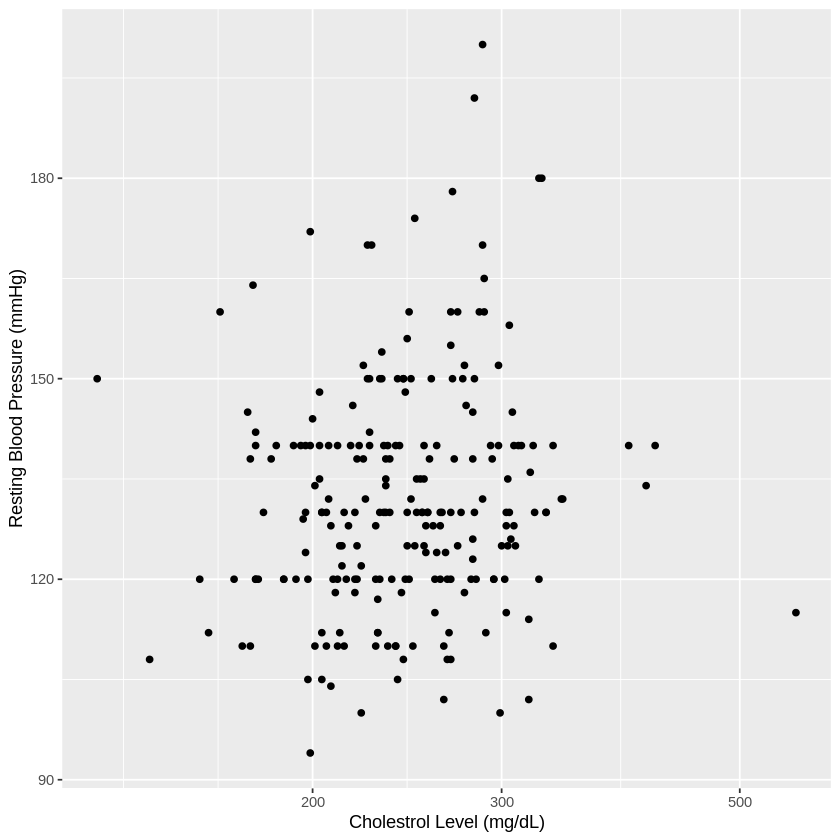

In [21]:
cleveland_plot <- cleveland_training |>
    ggplot(aes(x=cholestrol, y=resting_bp)) +
    geom_point() +
    labs(x="Cholestrol Level (mg/dL)", y="Resting Blood Pressure (mmHg)") + 
    scale_x_log10()

cleveland_plot

## Methods

- We will use a basic regression model to predict for blood pressure
- Form training and testing data
- Use RMSPE to evaluate our prediction
- Use R to perform cross-validation to choose optimal K
- Since we only have one predictor which is cholesterol, it’s not necessary to use standardization (can if we want to though)
- Recipe, model
- Creat 5-fold cross validation object, put recipe and model specification in workflow
- Assess model using RMSPE on the test data
- Retrain KNN regression model on training data set, using K=37 neighbors.
- Use predict to make predictions ond test data and metrics to compute summary of regression analysis
- Include age as our second predictor and conduct multivariable KNN regression
- We will use a scatterplot to visualize our predictions

## Expected Outcomes and Predictions:
By using the relationship between blood pressure and cholestrol, our regression model can help with identifying patients at risk of heart disease. This is clinically significant because identifying these risk factors can help prevent an impending heart attack. The findings can help people understand the correlation between blood pressure and cholesterol, which would raise awareness as well as allow early intervention and treatment to reduce the risk of heart disease in high risk patients.